In [8]:
import torch
import torch.nn as nn
import os
import sys

sys.path.append('../')

import numpy as np
import math
import scipy.special as bessel
from scipy.io import loadmat
import pickle
import importlib
import DRLPDE.neuralnets as neuralnets

import matplotlib.pyplot as plt
import cv2

import matplotlib as mpl

mpl.rcParams['figure.dpi']= 300
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 12

In [9]:
numpts_x = 128
numpts_y =  128

xg = torch.cat( ( torch.torch.cartesian_prod( torch.linspace(-math.pi,math.pi,numpts_x),
                                              torch.linspace(-math.pi,math.pi,numpts_y)),
                   torch.zeros((numpts_x*numpts_y,1))), dim=1).requires_grad_(True)

integral_factor =  (4*math.pi**2)/(numpts_x - 1)/(numpts_y-1)


In [10]:
### Load Trained model
loadmodel = 'thesis7'

In [11]:
filename = 'Error_Plot_' + loadmodel
imagesfolder = "images/"

with open('../experiments/' + loadmodel + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

with open('../experiments/'  + loadmodel + '_losses.pickle', 'rb') as f:
    losses = pickle.load(f)

problem = importlib.import_module(".TaylorGreen", package='examples')

input_dim = [problem.x_dim, problem.t_dim, problem.hyper_dim]
output_dim = problem.output_dim

if parameters['neuralnetwork'] == 'FeedForward':
    MyNeuralNetwork = neuralnets.FeedForwardNN
elif parameters['neuralnetwork'] == 'Incompressible':
    MyNeuralNetwork = neuralnets.IncompressibleNN
elif parameters['neuralnetwork'] == 'ResNet':
    MyNeuralNetwork = neuralnets.ResNetNN
elif parameters['neuralnetwork'] == 'ResNetIncompressible':
    MyNeuralNetwork = neuralnets.ResNetIncompressible
    
nn_size = parameters['nn_size']

model = MyNeuralNetwork(input_dim, output_dim, **nn_size)
model.load_state_dict(torch.load("../savedmodels/" + loadmodel + ".pt"))

#Trained_Pressure = model_pressure(xg).reshape(numpts_x, numpts_y).detach().numpy()

<All keys matched successfully>

In [12]:
### True Solution
mu = 1.0

def true_solution(X):
    u = torch.stack( ( torch.cos(X[:,0])*torch.sin(X[:,1])*torch.exp(-2*mu*X[:,2]),
                       -torch.sin(X[:,0])*torch.cos(X[:,1])*torch.exp(-2*mu*X[:,2]) ), dim=1)
    return u

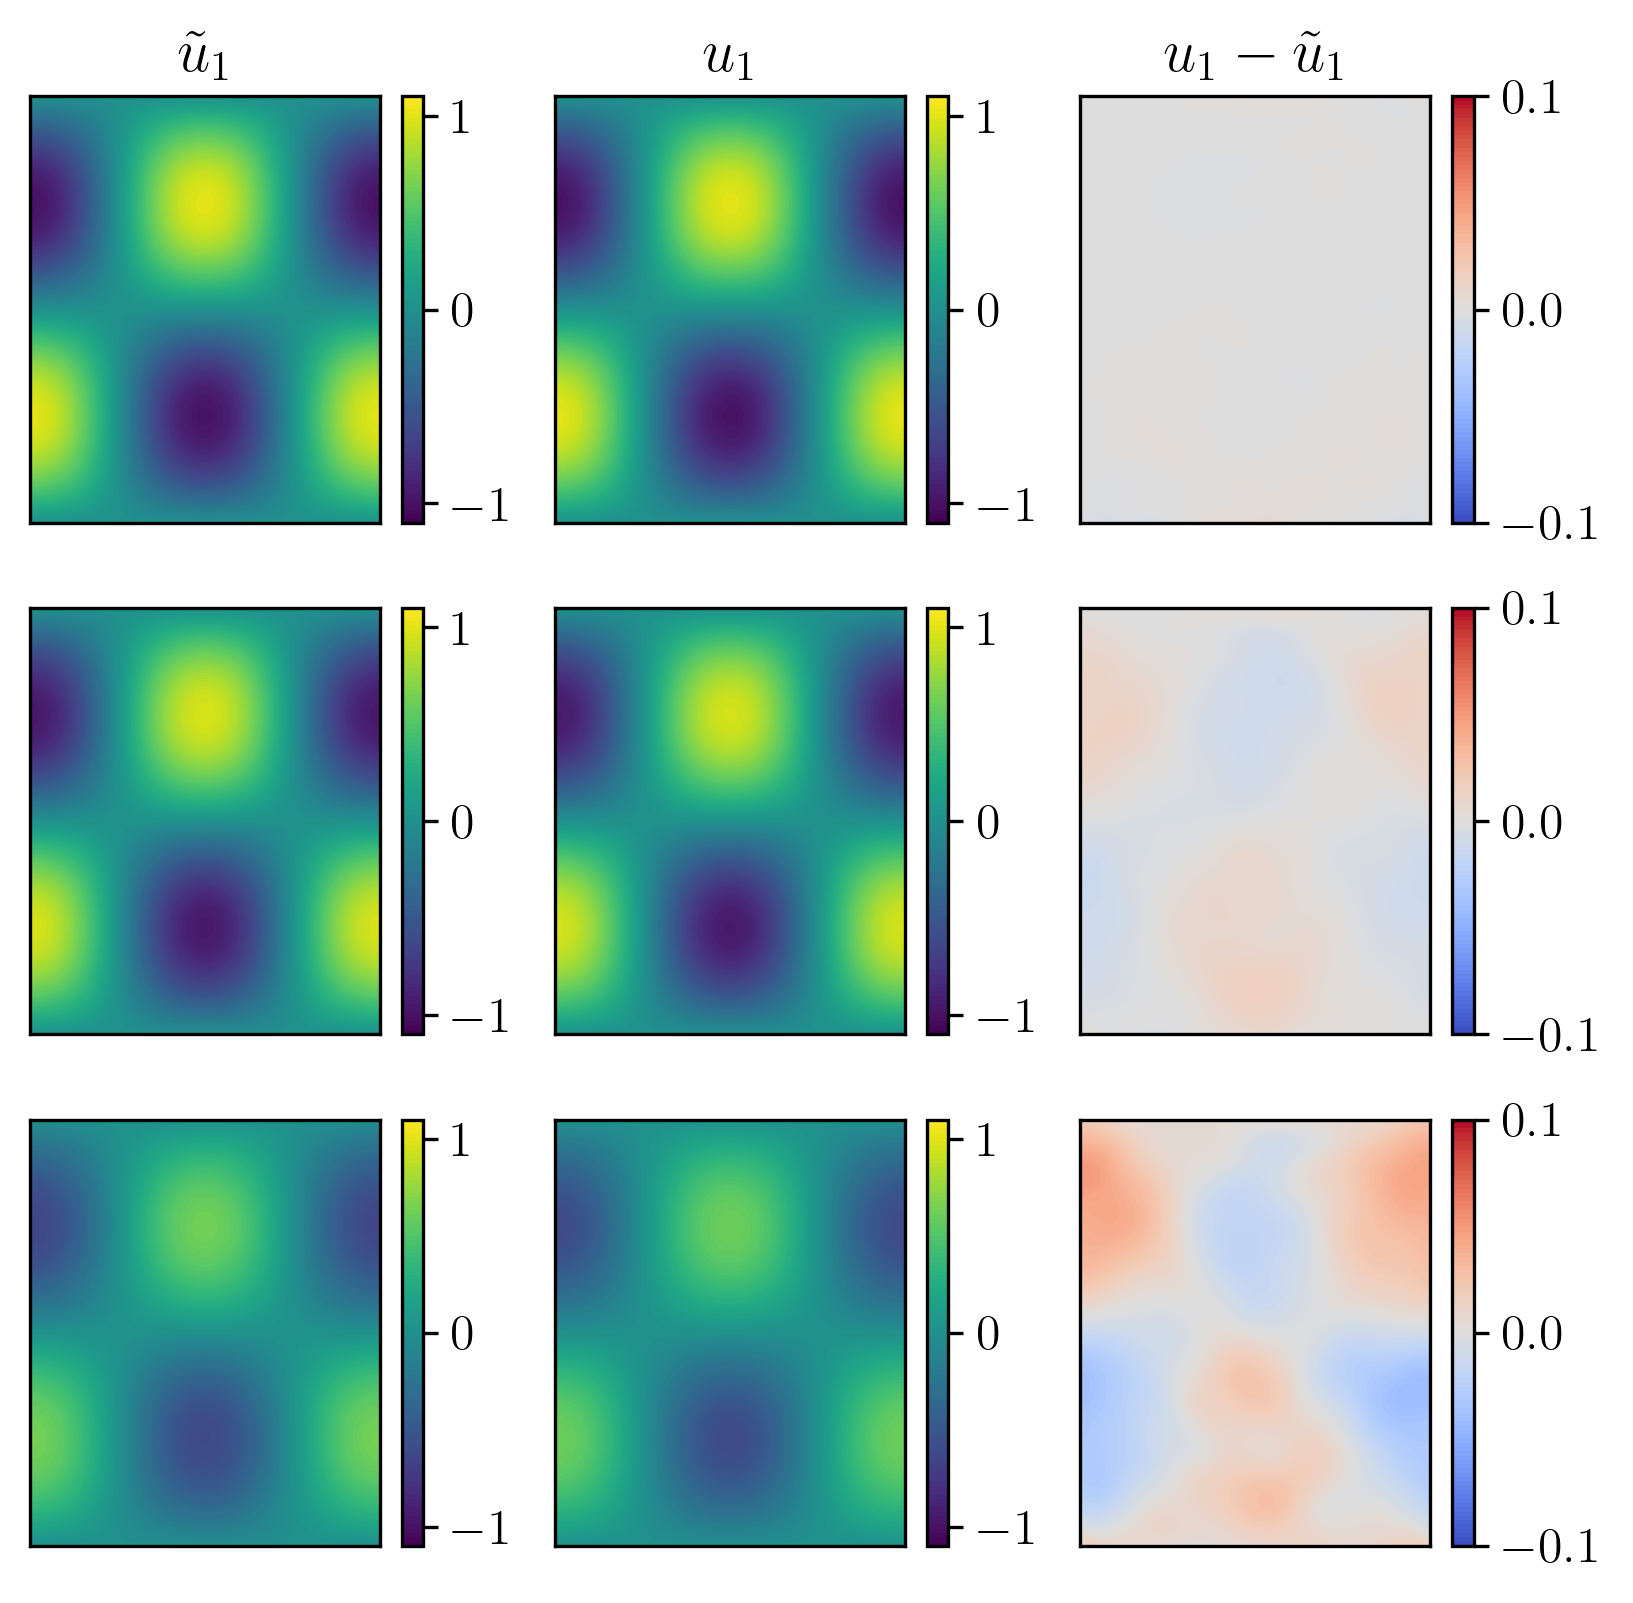

In [13]:
### Plotting

levels_flow = np.linspace(-1.1, 1.1, 100)
levels_tick = np.linspace(-1, 1, 3)

error_levels = np.linspace(-0.1, 0.1, 100)
error_tick = np.linspace(-0.1, 0.1 ,3)

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[6.4, 6.4])

xplot = xg[:,0].reshape(numpts_x, numpts_y).detach().numpy()
yplot = xg[:,1].reshape(numpts_x, numpts_y).detach().numpy()

### Different Times

# t = 0

xg.requires_grad=False
xg[:,2] = 0.0
xg.requires_grad=True

Trained_Vel = model(xg).reshape(numpts_x, numpts_y, 2).detach().numpy()
Trained_Vel_U = Trained_Vel[:,:,0]

#Trained_Speed = np.sqrt( Trained_Vel[:,:,0]**2 + Trained_Vel[:,:,1]**2)

True_Vel = true_solution(xg)
True_Vel_U = True_Vel[:,0].reshape(numpts_x, numpts_y).detach().numpy()

contour0 = ax[0,0].contourf(xplot, yplot, Trained_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[0,0].set_title(r'$\tilde{u}_1$')
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])
plt.colorbar(contour0, ticks =levels_tick, ax=ax[0,0])

ax[0,0].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour1 = ax[0,1].contourf(xplot, yplot, True_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[0,1].set_title(r'$u_1$')
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
plt.colorbar(contour1, ticks =levels_tick, ax=ax[0,1])

ax[0,1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour2 = ax[0,2].contourf(xplot, yplot, True_Vel_U - Trained_Vel_U, levels=error_levels, cmap=plt.cm.coolwarm)
ax[0,2].set_title(r'$u_1 - \tilde{u}_1$')
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
plt.colorbar(contour2, ticks =error_tick, ax=ax[0,2])

ax[0,2].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

# t = 0.025

xg.requires_grad=False
xg[:,2] = 0.025
xg.requires_grad=True

Trained_Vel = model(xg).reshape(numpts_x, numpts_y, 2).detach().numpy()
Trained_Vel_U = Trained_Vel[:,:,0]

True_Vel = true_solution(xg)
True_Vel_U = True_Vel[:,0].reshape(numpts_x, numpts_y).detach().numpy()

contour3 = ax[1,0].contourf(xplot, yplot, Trained_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])
plt.colorbar(contour3, ticks =levels_tick, ax=ax[1,0])

ax[1,0].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour4 = ax[1,1].contourf(xplot, yplot, True_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
plt.colorbar(contour4, ticks =levels_tick, ax=ax[1,1])

ax[1,1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour5 = ax[1,2].contourf(xplot, yplot, True_Vel_U - Trained_Vel_U, levels=error_levels, cmap=plt.cm.coolwarm)
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])
plt.colorbar(contour5, ticks =error_tick, ax=ax[1,2])

ax[1,2].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

# t = 0.25

xg.requires_grad=False
xg[:,2] = 0.25
xg.requires_grad=True

Trained_Vel = model(xg).reshape(numpts_x, numpts_y, 2).detach().numpy()
Trained_Vel_U = Trained_Vel[:,:,0]

True_Vel = true_solution(xg)
True_Vel_U = True_Vel[:,0].reshape(numpts_x, numpts_y).detach().numpy()

contour6 = ax[2,0].contourf(xplot, yplot, Trained_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[2,0].set_xticklabels([])
ax[2,0].set_yticklabels([])
plt.colorbar(contour6, ticks =levels_tick, ax=ax[2,0])

ax[2,0].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour7 = ax[2,1].contourf(xplot, yplot, True_Vel_U, levels_flow, cmap=plt.cm.viridis)
ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
plt.colorbar(contour7, ticks =levels_tick, ax=ax[2,1])

ax[2,1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

contour8 = ax[2,2].contourf(xplot, yplot, True_Vel_U - Trained_Vel_U, levels=error_levels, cmap=plt.cm.coolwarm)
ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
plt.colorbar(contour8, ticks =error_tick, ax=ax[2,2])

ax[2,2].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False
)

#plt.tight_layout(pad=5.0)

#fig.savefig('images/JCPexample6', facecolor='w', transparent=False)

In [14]:
### Error Calculation

numpts_time = 50
dt = 0.25/numpts_time

L2_error = 0
Linf_error = 0
L2_norm_true = 0

for tt in range(numpts_time):
    xg.requires_grad=False
    xg[:,2] = tt*dt
    xg.requires_grad=True

    Trained_Vel = model(xg).reshape(numpts_x, numpts_y, 2).detach().numpy()
    Trained_Vel_U = Trained_Vel[:,:,0]
    Trained_Vel_V = Trained_Vel[:,:,1]

    True_Vel = true_solution(xg)
    True_Vel_U = True_Vel[:,0].reshape(numpts_x, numpts_y).detach().numpy()
    True_Vel_V = True_Vel[:,1].reshape(numpts_x, numpts_y).detach().numpy()

    L2_error +=  ( np.sum( (Trained_Vel_U - True_Vel_U)**2 ) +  np.sum( (Trained_Vel_V - True_Vel_V)**2) )*integral_factor*dt

    Linf_error = np.max( [np.max(np.abs(Trained_Vel_U - True_Vel_U)), 
                          np.max(np.abs(Trained_Vel_V - True_Vel_V)), 
                          Linf_error])

    L2_norm_true += ( np.sum( True_Vel_U**2 ) + np.sum( True_Vel_V**2 ))*integral_factor*dt

L2_error = np.sqrt(L2_error)
L2_norm_true = np.sqrt(L2_norm_true)

print('L2 error = {:.4f}'.format(L2_error))
print('Linf error = {:.4f}'.format(Linf_error))
print('L2 Relative error ={:.4f}'.format(L2_error/L2_norm_true))


L2 error = 0.0722
Linf error = 0.0496
L2 Relative error =0.0404
